# Using bandits wisely

The idea here is to define the Best Allocated Strategy (BAS) - perturb this one such that strategies form a *full cycle* (defined later) and apply a k-bandits algorithm that selects for each game a strategy that wins with highest probability.

## 1) Best Allocated Strategy (BAS)

The BAS is by definition the strategy that best allocates the cards in hand according to the deck's cards value. Thus, it maximizes the player's preference to win a given card. See the table below.


Given that no player knows the others' strategies, this strategy is inevitably the most reasonable one to start with and should be perturbed accordingly when some players learn these moves. Indeed, as this strategy - almost deterministic - does not depend on other players' strategy, one player able to identify such matching would easily beat such strategy by sacrifying her one on the 15 and plays always a +1 higher card on the remaining.

In [ ]:
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import more_itertools as mit

from game import *
from player import Player, RandomPlayer, MaxPlayer, MinPlayer, NNPlayer, BonusCravingPlayer, MalusAdverse, GetRidOfBadCards, Robot, BestAllocationPlayer, BAS1Player, BAS2Player, BAS2bisPlayer, BASfusionPlayer
from analyse import read_game, plot_win_over_time

In [ ]:
n_player = 3
n_cards = 5

game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=True)
game.player_list_[0] = BestAllocationPlayer("BestAllocationPlayer",n_cards)
game.player_list_[1] = BAS1Player("BAS1Player",n_cards)
game.player_list_[2] = BAS2Player("BAS2Player",n_cards)
game.play()

Game ready with players: [RandomPlayer 0, RandomPlayer 1, RandomPlayer 2]
and cards: [5, 2, -2, -3, 6, 1, 8, -4, -5, -1, 9, 7, 10, 3, 4]
---
Card for this turn is: 5
Cards played:
BestAllocationPlayer BestAllocationPlayer: 10
BAS1Player BAS1Player: 10
BAS2Player BAS2Player: 10
No one won this card
---
Card for this turn is: 2
Cards played:
BestAllocationPlayer BestAllocationPlayer: 4
BAS1Player BAS1Player: 4
BAS2Player BAS2Player: 4
No one won this card
---
Card for this turn is: -2
Cards played:
BestAllocationPlayer BestAllocationPlayer: 3
BAS1Player BAS1Player: 3
BAS2Player BAS2Player: 3
No one won this card
---
Card for this turn is: -3
Cards played:
BestAllocationPlayer BestAllocationPlayer: 6
BAS1Player BAS1Player: 6
BAS2Player BAS2Player: 6
No one won this card
---
Card for this turn is: 6
Cards played:
BestAllocationPlayer BestAllocationPlayer: 11
BAS1Player BAS1Player: 11
BAS2Player BAS2Player: 11
No one won this card
---
Card for this turn is: 1
Cards played:
BestAllocationPla

([BestAllocationPlayer BestAllocationPlayer,
  BAS1Player BAS1Player,
  BAS2Player BAS2Player],
 [{'card': 5, 'player_card_list': [10, 10, 10], 'turn_winner': 'None'},
  {'card': 2, 'player_card_list': [4, 4, 4], 'turn_winner': 'None'},
  {'card': -2, 'player_card_list': [3, 3, 3], 'turn_winner': 'None'},
  {'card': -3, 'player_card_list': [6, 6, 6], 'turn_winner': 'None'},
  {'card': 6, 'player_card_list': [11, 11, 11], 'turn_winner': 'None'},
  {'card': 1, 'player_card_list': [2, 2, 2], 'turn_winner': 'None'},
  {'card': 8,
   'player_card_list': [13, 14, 13],
   'turn_winner': 'BAS1Player BAS1Player'},
  {'card': -4, 'player_card_list': [8, 8, 8], 'turn_winner': 'None'},
  {'card': -5, 'player_card_list': [9, 9, 9], 'turn_winner': 'None'},
  {'card': -1, 'player_card_list': [1, 1, 1], 'turn_winner': 'None'},
  {'card': 9,
   'player_card_list': [14, 15, 15],
   'turn_winner': 'BestAllocationPlayer BestAllocationPlayer'},
  {'card': 7, 'player_card_list': [12, 12, 12], 'turn_winner':

100%|██████████| 50000/50000 [00:13<00:00, 3657.77it/s]
Number of games: 50000


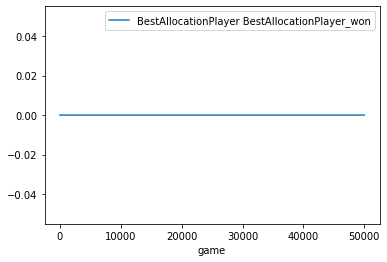

In [ ]:
n_player = 3
n_cards = 5

for _ in range(1):
    n_game = 50000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = BestAllocationPlayer("BestAllocationPlayer",n_cards)
    game.player_list_[1] = BAS1Player("BAS1Player",n_cards)
    game.player_list_[2] = BAS2Player("BAS2Player",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

In [ ]:
winner_list_list

[['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Player'],
 ['BAS1Player BAS1Pl

In [ ]:
(df_reward.iloc[:,0]==0.5).sum()

0

In [ ]:
(df_reward.iloc[:,0]==-0.5).sum()

0

In [ ]:
df_reward.iloc[:10]

,BestAllocationPlayer BestAllocationPlayer_won
game,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


In [ ]:
def experiment_solo(player_class, opponent_class=RandomPlayer, n_game=5000, n_cards=5):
    n_player_list = [2,3,6]
    for n_player in n_player_list:
        game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
        game.player_list_[0] = player_class("Guinea Pig", n_cards)
        for i in range(1, n_player):
            game.player_list_[i] = opponent_class(i, n_cards)
        game_summary_list = []
        winner_list_list = []
        for _ in tqdm(range(n_game)):
            player_list, game_summary, winner_list = game.play()
            game_summary_list.append(game_summary)
            winner_list_list.append(list(map(str, winner_list)))
        with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_experiments_{opponent_class.__name__}_{player_class.__name__}.json", "w+") as f:
            json.dump(
                {
                    "player_list": list(map(str, player_list)),
                    "game_summary_list": game_summary_list,
                    "winner_list_list": winner_list_list,
                },
                f,
                indent=4,
            )

def experiment_solo_show(player_class, opponent_class=RandomPlayer, n_game=5000, n_cards=5):
    n_player_list = [2,3,6]
    for n_player in n_player_list:
        player_list, df_game = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_experiments_{opponent_class.__name__}_{player_class.__name__}.json", return_player=True)
        
        # Plotting the game wins
        fig, ax = plt.subplots()
        ax.set_title(f"Windowed game wins for {player_class.__name__} against {n_player-1} {opponent_class.__name__} player{'s' if n_player > 2 else ''}")
        df_win = plot_win_over_time(df_game, player_list=player_list, window=500, fig=fig, ax=ax)
        fig.show()

        #Plotting cumulative reward
        df_reward = df_win.drop(columns=["game_winner"]).astype(int)
        df_reward = df_reward - 1/df_reward.shape[1]
        print("Sum of rewards:", df_reward.sum().sum())
        column = df_reward.columns[df_reward.columns.str.contains("Guinea Pig")]
        fig, ax = plt.subplots()
        ax.set_title(f"Cumulative reward for {player_class.__name__} against {n_player-1} {opponent_class.__name__} player{'s' if n_player > 2 else ''}")
        df_reward.loc[:,column].cumsum().plot(ax=ax)
        fig.show()

In [ ]:
experiment_solo(BAS2bisPlayer, opponent_class=BASfusionPlayer)

100%|██████████| 5000/5000 [00:01<00:00, 2754.13it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 5000
Sum of rewards: 0.0
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 5000
Sum of rewards: 0.0
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 5000
Sum of rewards: 0.0


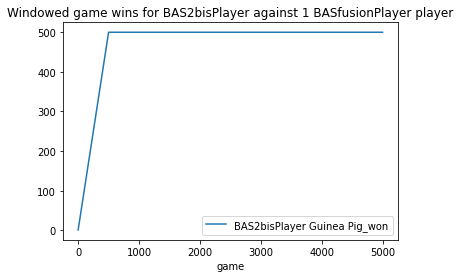

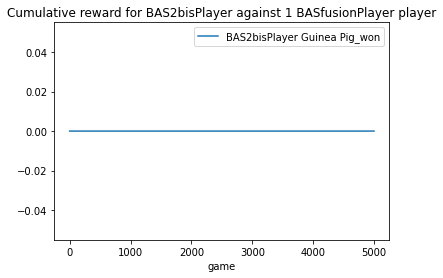

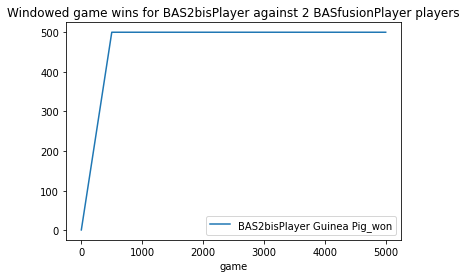

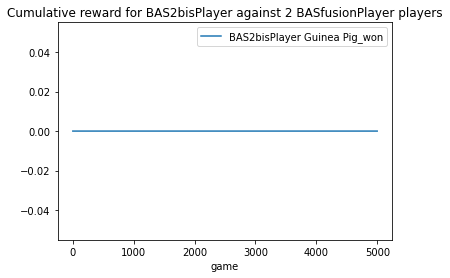

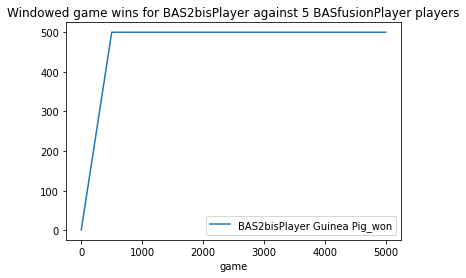

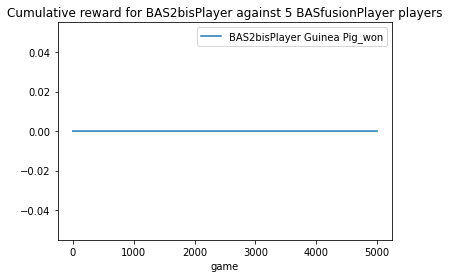

In [ ]:
experiment_solo_show(BAS2bisPlayer, opponent_class=BASfusionPlayer)

## 2) Perturbing wisely the BAS

So as to find wise perturbed strategies, let's notice basic observations about favorable and unfavorable situations in the game.
- By construction, the game is assymetric in favor of bonuses ($105$ points in total) against maluses (-15 points in total): so it's always preferable to look for high gains instead of fearing to receive maluses. 
- For a reasonable player, it is very likely he will play high cards for high bonuses and lower cards for low bonuses/maluses.
- The more players there are and the more probable ties become. 
- If one player has the highest card(s) in hand (the others already played cards of the same rank or of higher rank), he has a decisive advantage on the remaining rounds: he can earn almost surely the best remaining deck's card.
- There are a priori bad moves: playing a 15 to try to earn a 1 or -1 is definitely wasteful: **we won't never play such bad moves.**
- There are smart moves: sacrifying a high deck's card playing a 1 allows to get rid of a bad card and may create the *I have higher cards in hand* advantage on the other players. But such move has to be played carefully.

CECI EST UN BROUILLON : je réfléchis à quel ensemble 'optimal' de stratégies sélectionner pour effectuer mon k-bandits ...


**Definition 1:** we say a strategy is *naive* if it is deterministic and only based on the observation of the current deck's card.

**Definition 2:** we say a naive strategy A *beats hardly* another strategy B if by construction A wins over B whatever the order of apparition of the deck's cards. Denote $A \succ B$. For exemple, *BAS1* $\succ$ *BAS* (see later). We will see in theorem 1 that $\succ$ does not define an *order relationship* as transitivity is violated.

**Definition 3:** we say a naive strategy A *beats softly* another strategy B if by construction A wins over B or ends up in a tie whatever the order of apparition of the deck's cards. Denote $A \succeq B$. For exemple, *BAS2`* $\succeq$ *BAS2*.
 
**Definition 4:** given a reference naive strategy A, we say B is the *naive best allocated strategy beating A* if B is naive, B *beats hardly* A and B minimizes its distance from the *BAS* strategy (i.e. allocate best his cards).

**Definition 5:** for a standard game, define BAS1 and BAS2 with the tables below.

**Lemma 0:** given a reference naive strategy A, the *naive best allocated strategy beating A* is unique.

**Theorem:** Assume the game has $n = 5$ malus cards. Then we have: 

- *BAS1* is the *naive best allocated strategy beating BAS*
- *BAS2* is the *naive best allocated strategy beating BAS1*
- *BAS2* $\prec$ *BAS* $\prec$ *BAS1* $\prec$ *BAS2* $\sim$ BAS2' with *BAS1* $\prec$ *BAS2'*
- There is no other naive strategy *s* that can beat hardly BAS, BAS1 and BAS2 all three at the same time. At best a strategy s is equivalent to one of the three (game ends in a tie) and beats hardly the other two (e.g.*BAS2'*). FALSE

*Proof:* Admitted. Combinatorics. The main intuition is if strategy *s* is better than *BAS*, then it must 'ressemble' *BAS1* which is best allocated. So at best *s* is either best allocated and is exactly *BAS1* or simply ends up in a tie with *BAS1* (lack of an argument here).



** Interpretation of the theorem for the standard game (n = 5): **

What is the *naive best allocated strategy beating BAS*? It's the *BAS1*. 
Then what is the *naive best allocated strategy beating the BAS1*? It's the *BAS2*. 
Then what is the *naive best allocated strategy beating the BAS2*? It's the *BAS*.

*"Le serpent se mord la queue"*.

Such theorem demonstrates there's no absolute winning strategy and this game is essentially equivalent to a *Paper-Scissor-Stone* game but with potentially several representatives for each option (e.g. *BAS2'* for *BAS2*).


Now the idea is to implement n-bandits algorithm with the full cycle defined by the theorem.

100%|██████████| 50000/50000 [00:04<00:00, 10172.62it/s]
Number of games: 50000


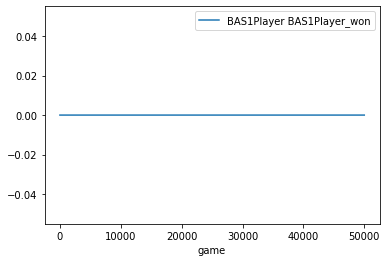

In [ ]:
n_player = 2
n_cards = 5

for _ in range(1):
    n_game = 50000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = BAS1Player("BAS1Player", n_cards)
    game.player_list_[1] = BestAllocationPlayer("BestAllocationPlayer",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

100%|██████████| 50000/50000 [00:05<00:00, 9580.22it/s] 
Number of games: 50000


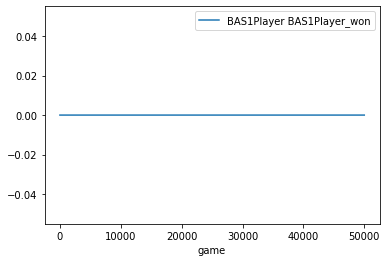

In [ ]:
n_player = 2
n_cards = 5

for _ in range(1):
    n_game = 50000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = BAS1Player("BAS1Player", n_cards)
    game.player_list_[1] = BestAllocationPlayer("BestAllocationPlayer",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

100%|██████████| 50000/50000 [00:04<00:00, 10177.86it/s]
Number of games: 50000


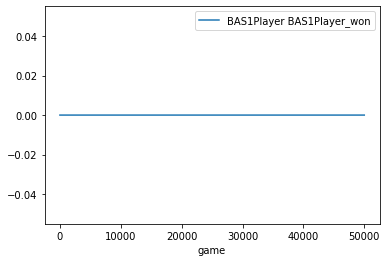

In [ ]:
n_player = 2
n_cards = 5

for _ in range(1):
    n_game = 50000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = BAS1Player("BAS1Player",n_cards)
    game.player_list_[1] = BestAllocationPlayer("BestAllocationPlayer",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

In [ ]:
n_player = 2
n_cards = 5

for _ in range(1):
    n_game = 50000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = BAS1Player("BAS1Player",n_cards)
    game.player_list_[1] = BASfusionPlayer("BASfusionPlayer",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>